In [1]:
# Import packages and Functions.py
import sys
sys.path.append('../')
from Functions import *
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

# Define the model parameters
num_samples = 4
dim = 2
alpha = 5

# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution with dimension dim
mu = np.zeros(dim)
identity_matrix = np.eye(dim)
cov_matrix = identity_matrix
points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Function af x
sum = Loss_function_fast(points,Y,alpha)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001 # Update the point[1][0]
sum_e = Loss_function_fast(point_e,Y,alpha)
print(sum_e)

# Gradient af x
gradient = Gradient_function_fast(point_number,dim,Y,points,alpha)[point_index]
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-1.7596492046688779
-1.7573464381878523
2.306022620552245


-0.0032561395266808013

In [3]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    sum = Loss_function_fast(points,Y,alpha) # Function af x

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001 # Update the point[1][0]
    sum_e = Loss_function_fast(point_e,Y,alpha) # Function af x+epsilon
    
    gradient = Gradient_function_fast(point_number,dim,Y,points,alpha)[point_index] # Gradient af x
            
    hist[n] = (sum_e-sum)/0.001-(gradient) # Error

(array([  2.,   0.,   1.,   1.,   5.,   5.,   7.,   4.,   5.,   9.,  12.,
         10.,  18.,  21.,  19.,  32.,  35.,  58.,  46.,  46.,  58.,  47.,
         53.,  62.,  58.,  78.,  51.,  38.,  77., 142.]),
 array([-5.31252567e-03, -5.06976601e-03, -4.82700635e-03, -4.58424670e-03,
        -4.34148704e-03, -4.09872738e-03, -3.85596773e-03, -3.61320807e-03,
        -3.37044841e-03, -3.12768876e-03, -2.88492910e-03, -2.64216944e-03,
        -2.39940979e-03, -2.15665013e-03, -1.91389047e-03, -1.67113082e-03,
        -1.42837116e-03, -1.18561150e-03, -9.42851846e-04, -7.00092189e-04,
        -4.57332532e-04, -2.14572875e-04,  2.81867813e-05,  2.70946438e-04,
         5.13706095e-04,  7.56465752e-04,  9.99225408e-04,  1.24198507e-03,
         1.48474472e-03,  1.72750438e-03,  1.97026404e-03]),
 <BarContainer object of 30 artists>)

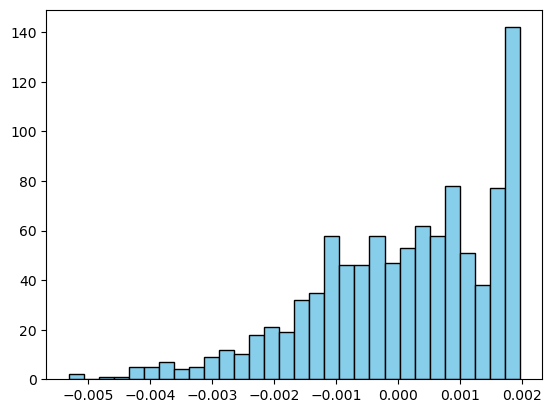

In [4]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')